In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# Загрузка файлов из облака
import gdown

In [ ]:
# data = pd.read_csv('отправка_комбинации поддержка после ПХТ 3 стадия.xlsx - отправка.csv')    # С помощью метода read_csv загружаем файл wine_base.csv и записываем данные в data

In [ ]:
# отсюда выгружаем файл
#data = pd.read_csv('/content/drive/My Drive/отправка_комбинации поддержка после ПХТ 3 стадия.xlsx - отправка.csv')

In [ ]:
# Загрузка файла датасета №1 НМИЦ профилактической медицины от 2023.09.06
url1 = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1Vcu3UZuw55Wtg2q_fFjf39YcoN-8Vz-Y'
# lung_cancer -> рак легких
url2 = '/content/lung_cancer_20230906.xlsx'
gdown.download(url1, url2, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1Vcu3UZuw55Wtg2q_fFjf39YcoN-8Vz-Y
To: /content/lung_cancer_20230906.xlsx
100%|██████████| 17.5M/17.5M [00:00<00:00, 186MB/s]


'/content/lung_cancer_20230906.xlsx'

In [ ]:
# Чтение данных из файла excel в pandas.DataFrame
data = pd.read_excel(url2)

In [ ]:
data.head() # С помощью метода head выводим первые 5 строк нашего ДатаФрейма

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [ ]:
data.shape

(248832, 21)

In [ ]:
# Прверка балансировки
data_colnames = data.columns.tolist()
# print(f'названия колонок: {len(df1_colnames)}: {df1_colnames}')

lst_count = len(data_colnames)
for i in range(lst_count):
  i_elem = data_colnames[i]
  print(f"{i}->{lst_count}: '{i_elem}'")

0->21: 'id_ответа'
1->21: 'Раса'
2->21: 'Пол'
3->21: 'Возраст'
4->21: 'Статус курения'
5->21: 'ECOG'
6->21: 'Есть опухолевая нагрузка? (симптомная опухоль)'
7->21: 'Ко-мутации KRAS'
8->21: 'Ко-мутации p53.'
9->21: 'Ко-мутации STK11'
10->21: 'Ко-мутации KEAP1'
11->21: 'Срок от окончания ХЛТ'
12->21: 'Молекулярный статус (только для неплоскоклеточного рака)'
13->21: 'PD-L1 статус'
14->21: 'Предпочтение пациента по ответу на терапию'
15->21: 'Ответ эксперта (Лактионов)'
16->21: 'Поставьте галочку, если уверены на 100%'
17->21: 'Если 75%'
18->21: 'Если 50%'
19->21: 'Альтернатива, если 50% - обязательно'
20->21: 'Комментарий'


In [ ]:
# Перебираем все названия столбцов и для каждого выводим список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

id_ответа : [     1      2      3 ... 248830 248831 248832]
Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' 2]
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектиниб'

In [ ]:
# проверяем Пропущеные значения
missing_values = data.isnull().sum()
print(missing_values)

id_ответа                                                   0
Раса                                                        0
Пол                                                         0
Возраст                                                     0
Статус курения                                              0
ECOG                                                        0
Есть опухолевая нагрузка? (симптомная опухоль)              0
Ко-мутации KRAS                                             0
Ко-мутации p53.                                             0
Ко-мутации STK11                                            0
Ко-мутации KEAP1                                            0
Срок от окончания ХЛТ                                       0
Молекулярный статус (только для неплоскоклеточного рака)    0
PD-L1 статус                                                0
Предпочтение пациента по ответу на терапию                  0
Ответ эксперта (Лактионов)                                  0
Поставьт

In [ ]:
# Удаление ненужных столбцов
del data['id_ответа']
del data['Комментарий']
del data['Альтернатива, если 50% - обязательно']
del data['Если 50%']
del data['Если 75%']
del data['Поставьте галочку, если уверены на 100%']

In [ ]:
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб


# Кодирование данных

In [ ]:
# One-Hot Encoding
encoded_data = pd.get_dummies(data)

In [ ]:
encoded_data

,Раса_Азиатская,Раса_Другая,Раса_Европейская,Пол_ Женский,Пол_ Мужской,Возраст_ >70,Возраст_ До 70,Статус курения_ В настоящее время,Статус курения_ Курение в прошлом (бросил более 1 года),Статус курения_ Курение в прошлом (бросил более 1 месяца до 1 года),...,Молекулярный статус (только для неплоскоклеточного рака)_ нет мутаций,PD-L1 статус_ Более 1%,PD-L1 статус_ Менее 1%,PD-L1 статус_ Не исследовался,Предпочтение пациента по ответу на терапию_ Результативность лечения,Предпочтение пациента по ответу на терапию_ сохранение качества жизни,Ответ эксперта (Лактионов)_Алектиниб,Ответ эксперта (Лактионов)_Дурвалумаб,Ответ эксперта (Лактионов)_Наблюдение,Ответ эксперта (Лактионов)_Осимертиниб
0,1,0,0,0,1,0,1,1,0,0,...,1,0,0,1,1,0,0,1,0,0
1,1,0,0,0,1,0,1,1,0,0,...,1,0,0,1,1,0,0,1,0,0
2,1,0,0,0,1,0,1,1,0,0,...,1,0,0,1,1,0,0,0,1,0
3,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
248828,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
248829,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
248830,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
encoded_data.columns

Index(['Раса_Азиатская', 'Раса_Другая', 'Раса_Европейская', 'Пол_ Женский',
       'Пол_ Мужской', 'Возраст_ >70', 'Возраст_ До 70',
       'Статус курения_ В настоящее время',
       'Статус курения_ Курение в прошлом (бросил более 1 года)',
       'Статус курения_ Курение в прошлом (бросил более 1 месяца до 1 года)',
       'ECOG_2', 'ECOG_ 0-1',
       'Есть опухолевая нагрузка? (симптомная опухоль)_ да',
       'Есть опухолевая нагрузка? (симптомная опухоль)_ нет',
       'Ко-мутации KRAS_ да', 'Ко-мутации KRAS_ нет', 'Ко-мутации p53._ да',
       'Ко-мутации p53._ нет', 'Ко-мутации STK11_ да', 'Ко-мутации STK11_ нет',
       'Ко-мутации KEAP1_ да', 'Ко-мутации KEAP1_ нет',
       'Срок от окончания ХЛТ_более 61 дня',
       'Срок от окончания ХЛТ_до 42 дней',
       'Срок от окончания ХЛТ_от 43 до 60 дней',
       'Молекулярный статус (только для неплоскоклеточного рака)_ ALK позитивный',
       'Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex19',
       'Молекул

In [ ]:
x = encoded_data[['Раса_Азиатская', 'Раса_Другая', 'Раса_Европейская', 'Пол_ Женский',
       'Пол_ Мужской', 'Возраст_ >70', 'Возраст_ До 70',
       'Статус курения_ В настоящее время',
       'Статус курения_ Курение в прошлом (бросил более 1 года)',
       'Статус курения_ Курение в прошлом (бросил более 1 месяца до 1 года)',
       'ECOG_2', 'ECOG_ 0-1',
       'Есть опухолевая нагрузка? (симптомная опухоль)_ да',
       'Есть опухолевая нагрузка? (симптомная опухоль)_ нет',
       'Ко-мутации KRAS_ да', 'Ко-мутации KRAS_ нет', 'Ко-мутации p53._ да',
       'Ко-мутации p53._ нет', 'Ко-мутации STK11_ да', 'Ко-мутации STK11_ нет',
       'Ко-мутации KEAP1_ да', 'Ко-мутации KEAP1_ нет',
       'Срок от окончания ХЛТ_более 61 дня',
       'Срок от окончания ХЛТ_до 42 дней',
       'Срок от окончания ХЛТ_от 43 до 60 дней',
       'Молекулярный статус (только для неплоскоклеточного рака)_ ALK позитивный',
       'Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex19',
       'Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex21',
       'Молекулярный статус (только для неплоскоклеточного рака)_ EGFR редкий вариант',
       'Молекулярный статус (только для неплоскоклеточного рака)_ не исследовались',
       'Молекулярный статус (только для неплоскоклеточного рака)_ нет мутаций',
       'PD-L1 статус_ Более 1%', 'PD-L1 статус_ Менее 1%',
       'PD-L1 статус_ Не исследовался',
       'Предпочтение пациента по ответу на терапию_ Результативность лечения',
       'Предпочтение пациента по ответу на терапию_ сохранение качества жизни']]

y = encoded_data[['Ответ эксперта (Лактионов)_Алектиниб',
       'Ответ эксперта (Лактионов)_Дурвалумаб',
       'Ответ эксперта (Лактионов)_Наблюдение',
       'Ответ эксперта (Лактионов)_Осимертиниб']]

x

,Раса_Азиатская,Раса_Другая,Раса_Европейская,Пол_ Женский,Пол_ Мужской,Возраст_ >70,Возраст_ До 70,Статус курения_ В настоящее время,Статус курения_ Курение в прошлом (бросил более 1 года),Статус курения_ Курение в прошлом (бросил более 1 месяца до 1 года),...,Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex19,Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex21,Молекулярный статус (только для неплоскоклеточного рака)_ EGFR редкий вариант,Молекулярный статус (только для неплоскоклеточного рака)_ не исследовались,Молекулярный статус (только для неплоскоклеточного рака)_ нет мутаций,PD-L1 статус_ Более 1%,PD-L1 статус_ Менее 1%,PD-L1 статус_ Не исследовался,Предпочтение пациента по ответу на терапию_ Результативность лечения,Предпочтение пациента по ответу на терапию_ сохранение качества жизни
0,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
248828,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
248829,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
248830,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


#Выявление лишних признаков с помощью feature_selection, chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                                Specs          Score
25  Молекулярный статус (только для неплоскоклеточ...  108600.103538
26  Молекулярный статус (только для неплоскоклеточ...   77278.426229
23                   Срок от окончания ХЛТ_до 42 дней   53700.097325
22                 Срок от окончания ХЛТ_более 61 дня   43908.196721
29  Молекулярный статус (только для неплоскоклеточ...   35818.353753
30  Молекулярный статус (только для неплоскоклеточ...   35818.353753
28  Молекулярный статус (только для неплоскоклеточ...   31953.836066
27  Молекулярный статус (только для неплоскоклеточ...   18809.704918
35  Предпочтение пациента по ответу на терапию_ со...    4379.389129
34  Предпочтение пациента по ответу на терапию_ Ре...    4379.389129


[6.95256230e-19 5.31424467e-19 8.82469682e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.19331620e-19
 6.91402905e-19 3.68552399e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.10449347e-01 1.54897540e-01
 5.22560524e-02 1.21031918e-01 1.22130970e-01 6.97124393e-02
 9.63101330e-02 6.89338280e-02 6.89850193e-02 2.61005402e-02
 2.42183960e-02 1.34284796e-02 3.61257895e-02 3.54195470e-02]


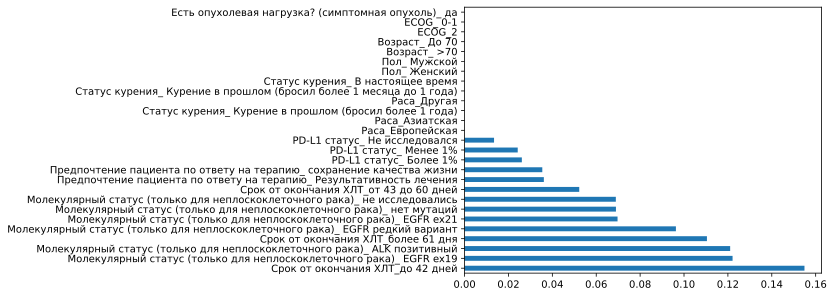

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Выбираем 3 признака с наивысшим "хи-квадрат".
chi2_features = SelectKBest(chi2, k = 3)
x_kbest_features = chi2_features.fit_transform(x, y)

# Самые влиятельные признаки
print("Количество признаков до преобразования:", x.shape[1])
print("Количество признаков после преобразования:", X_kbest_features.shape[1])
chi2_features.get_feature_names_out()

Количество признаков до преобразования: 36
Количество признаков после преобразования: 3


array(['Срок от окончания ХЛТ_до 42 дней',
       'Молекулярный статус (только для неплоскоклеточного рака)_ ALK позитивный',
       'Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex19'],
      dtype=object)

# Подготовка для обучения

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam, Ftrl
from tensorflow.keras.layers import Activation
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import matplotlib.pyplot as plt
import gdown, os, random
import csv
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
x_all, x_test, y_all, y_test = train_test_split(x,
                                                y,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 3)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 3)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(201553, 36)
(22395, 36)
(201553, 4)
(22395, 4)


# Обучение НС

In [ ]:
from sklearn import model_selection

#Создаем нейросеть
model_simple = Sequential()

model_simple.add(Dense(1000, input_dim=36, activation='relu'))
model_simple.add(Dropout(0.2))
model_simple.add(Dense(4, activation='softmax'))

model_simple.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

history = model_simple.fit(x_train,
                           y_train,
                           batch_size=32,
                           epochs=10,
                           validation_data=(x_val,
                                            y_val),
                           verbose=1)

Epoch 1/10
6299/6299 [==============================] - 24s 4ms/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 6.8509e-06 - val_accuracy: 1.0000
Epoch 2/10
6299/6299 [==============================] - 26s 4ms/step - loss: 1.2945e-04 - accuracy: 1.0000 - val_loss: 7.5210e-07 - val_accuracy: 1.0000
Epoch 3/10
6299/6299 [==============================] - 26s 4ms/step - loss: 1.6594e-06 - accuracy: 1.0000 - val_loss: 5.0170e-08 - val_accuracy: 1.0000
Epoch 4/10
6299/6299 [==============================] - 26s 4ms/step - loss: 3.4985e-05 - accuracy: 1.0000 - val_loss: 4.2872e-08 - val_accuracy: 1.0000
Epoch 5/10
6299/6299 [==============================] - 24s 4ms/step - loss: 2.0617e-07 - accuracy: 1.0000 - val_loss: 1.4372e-09 - val_accuracy: 1.0000
Epoch 6/10
6299/6299 [==============================] - 25s 4ms/step - loss: 2.0391e-08 - accuracy: 1.0000 - val_loss: 5.3230e-11 - val_accuracy: 1.0000
Epoch 7/10
6299/6299 [==============================] - 25s 4ms/step - loss: 5.2361e-0

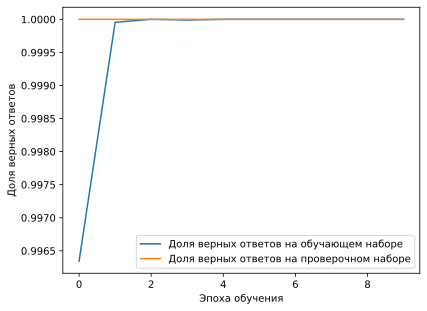

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

In [ ]:
scores = model_simple.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

778/778 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
print(type(scores))
print(scores)

<class 'list'>
[0.0, 1.0]


In [ ]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 100.0 %
